<a href="https://colab.research.google.com/github/sanglee/ml_basics_2019_IEIE/blob/master/2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<br>

# Machine Learning

<br>

## Sangkyun Lee <br> Hanyang University ERICA

<br>
<br>

In [0]:
from IPython.display import Image
%matplotlib inline

# Choosing a classification algorithm

#### "No Free Lunch" theorem: 

No single classiifier works best across all possible scenarios. 

- In practice, it is always recommended to compare the performance of at least a handful of different learning algorithms
- Select the best model for the particular problem
    - the number of features or samples
    - the amount of noise in a dataset
    - the classes are linearly separable or not.

#### 5 main steps training an ML algorithm:
1. Selection of features (feature selection)
2. Choosing a performance metric.
3. Choosing a classifier and optimization algorithm.
4. Tuning the algorithm (validation-set)
5. Evaluating the performance of the model (test-set)

# First steps with scikit-learn

Loading the Iris dataset from scikit-learn. Here, the third column represents the petal length, and the fourth column the petal width of the flower samples. The classes are already converted to integer labels where 0=Iris-Setosa, 1=Iris-Versicolor, 2=Iris-Virginica.

In [0]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


Splitting data into 70% training and 30% test data:

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

In [0]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train: [35 35 35]
Labels counts in y_test: [15 15 15]


Standardizing the features:

In [0]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train) # not on the test set
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

<br>
<br>

## Training a perceptron via scikit-learn

In [0]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(max_iter=40, eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)
y_train                                 

array([0, 0, 2, 2, 0, 2, 2, 0, 2, 1, 1, 1, 0, 1, 1, 2, 0, 1, 1, 0, 2, 2,
       1, 1, 1, 2, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 1, 2, 2, 0, 2, 0, 2, 0,
       0, 1, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 1, 2, 0, 1, 0, 1, 2, 0, 0, 1,
       2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 0, 0, 2, 1, 2, 2, 0, 1, 2, 2, 0, 0,
       2, 0, 2, 1, 1, 1, 0, 2, 1, 0, 0, 1, 0, 1, 0, 0, 0])

In [0]:
y_pred = ppn.predict(X_test_std)
print(y_pred)
print('Misclassified samples: %d' % (y_test != y_pred).sum())

[2 0 0 2 1 1 2 1 2 0 0 2 0 1 0 1 2 1 1 2 2 0 1 2 1 1 0 2 0 2 0 0 1 1 2 2 0
 0 0 1 2 2 1 0 0]
Misclassified samples: 1


In [0]:
from sklearn.metrics import accuracy_score

print('Accuracy: %.2f' % accuracy_score(y_test, y_pred))

Accuracy: 0.98


In [0]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=[colors[idx]]*sum(y == cl),
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

Training a perceptron model using the standardized training data:

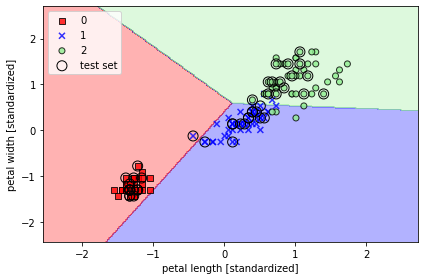

In [0]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined_std, y=y_combined,
                      classifier=ppn, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')

plt.tight_layout()
# plt.savefig('./figures/iris_perceptron_scikit.png', dpi=300)
plt.show()

<br>
<br>

# Modeling class probabilities via logistic regression

#### Predicting Binomial Labels
$$ 
x \in \mathbb R^m, \;\; y \in \{0,1\}
$$

$$
p = \mathbb P(Y=1 | X=x)
$$

#### Odds-ratio
$$
  \frac{p}{1-p}
$$



#### Logit function (log odds ratio)
$$
 \text{logit}(p) = \log \frac{p}{1-p} \in (-\infty, +\infty)
$$

We model the logit function by a linear function:
$$
\text{logit}(p) = w^T x = z \;\; \text{(net input)}
$$

#### Logistic (Sigmoid) Function

To predict the probability, we use the inverse of the logit function:
$$
 p = \phi(z) = \frac{1}{1 + \exp(-z)}
$$

### Logistic regression intuition and conditional probabilities

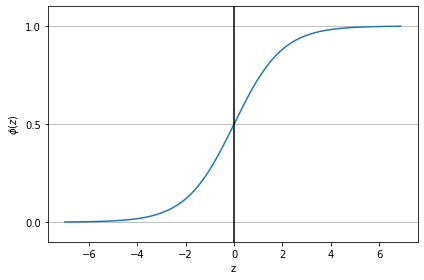

In [0]:
import matplotlib.pyplot as plt
import numpy as np


def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)

plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')

# y axis ticks and gridline
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)

plt.tight_layout()
# plt.savefig('./figures/sigmoid.png', dpi=300)
plt.show()

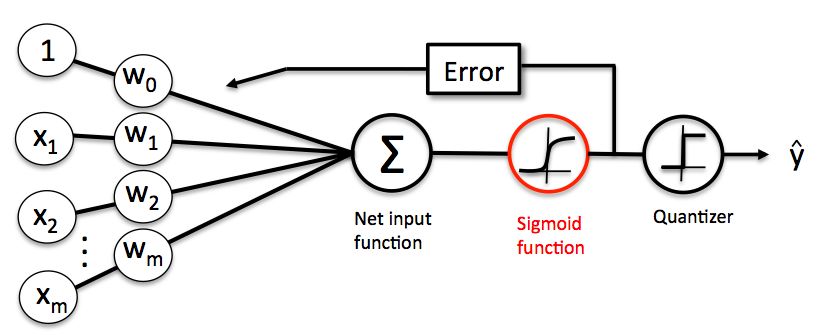

In [0]:
Image(filename='./images/03_03.png', width=500) 

<br>
<br>

### Learning the weights of the logistic cost function

#### Likelihood Function

$$
 L(w) = \mathbb P(y|x,w) = \prod_{i=1}^n \mathbb P(y^{(i)}|x^{(i)},w) = \prod_{i=1}^n \phi(z^{(i)})^{y^{(i)}} (1-\phi(z^{(i)}))^{1-y^{(i)}} 
$$

#### Log Likelihood Function
$$
 \ell(w) = \log L(w) = \sum_{i=1}^n y^{(i)} \log \phi(z^{(i)}) + (1-y^{(i)}) \log (1-\phi(z^{(i)}))
$$

#### Logistic Regression Training Problem
$$
\min_w \;\; J(w) = -\ell(w)
$$

#### The shape of a single summand in J(w)

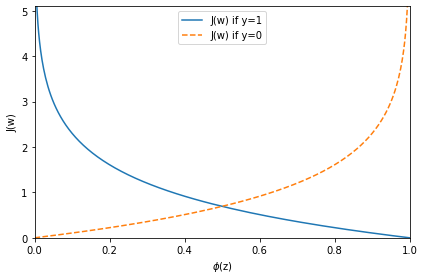

In [0]:
def cost_1(z):
    return - np.log(sigmoid(z))


def cost_0(z):
    return - np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)

c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) if y=1')

c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) if y=0')

plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
# plt.savefig('./figures/log_cost.png', dpi=300)
plt.show()

<br>
<br>

### Training a logistic regression model with scikit-learn

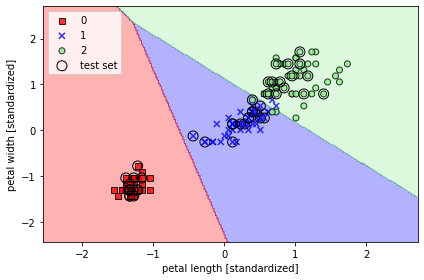

In [0]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=100.0, random_state=1, solver='liblinear', multi_class='auto')
lr.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=lr, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_06.png', dpi=300)
plt.show()

In [0]:
lr.predict_proba(X_test_std[:3, :])

array([[3.17983737e-08, 1.44886616e-01, 8.55113353e-01],
       [8.33962295e-01, 1.66037705e-01, 4.55557009e-12],
       [8.48762934e-01, 1.51237066e-01, 4.63166788e-13]])

In [0]:
lr.predict_proba(X_test_std[:3, :]).sum(axis=1)

array([1., 1., 1.])

In [0]:
lr.predict_proba(X_test_std[:3, :]).argmax(axis=1)

array([2, 0, 0])

<br>
<br>

### Tackling overfitting via regularization

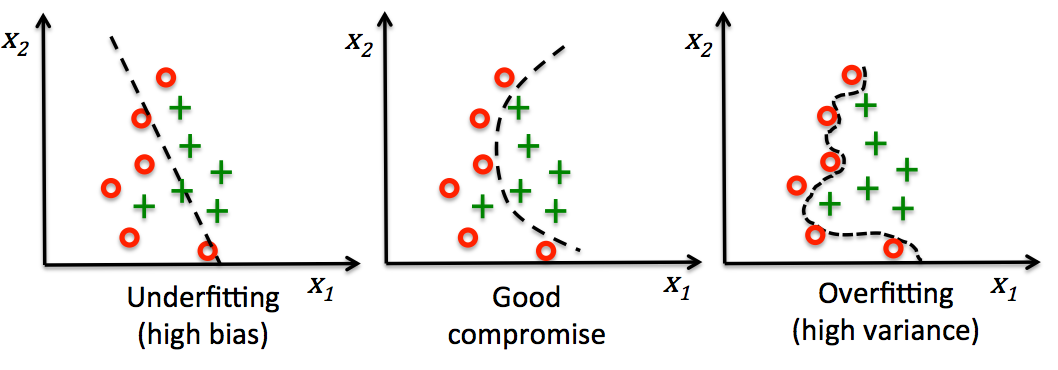

In [0]:
Image(filename='./images/03_06.png', width=700) 

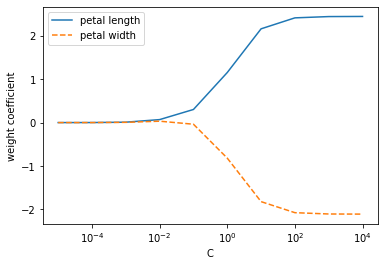

In [0]:
weights, params = [], []
for c in np.arange(-5., 5.):
    lr = LogisticRegression(C=10.**c, random_state=0, solver='liblinear', multi_class='auto')
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)
plt.plot(params, weights[:, 0],
         label='petal length')
plt.plot(params, weights[:, 1], linestyle='--',
         label='petal width')
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.legend(loc='upper left')
plt.xscale('log')
# plt.savefig('./figures/regression_path.png', dpi=300)
plt.show()

<br>
<br>

# Maximum margin classification with support vector machines

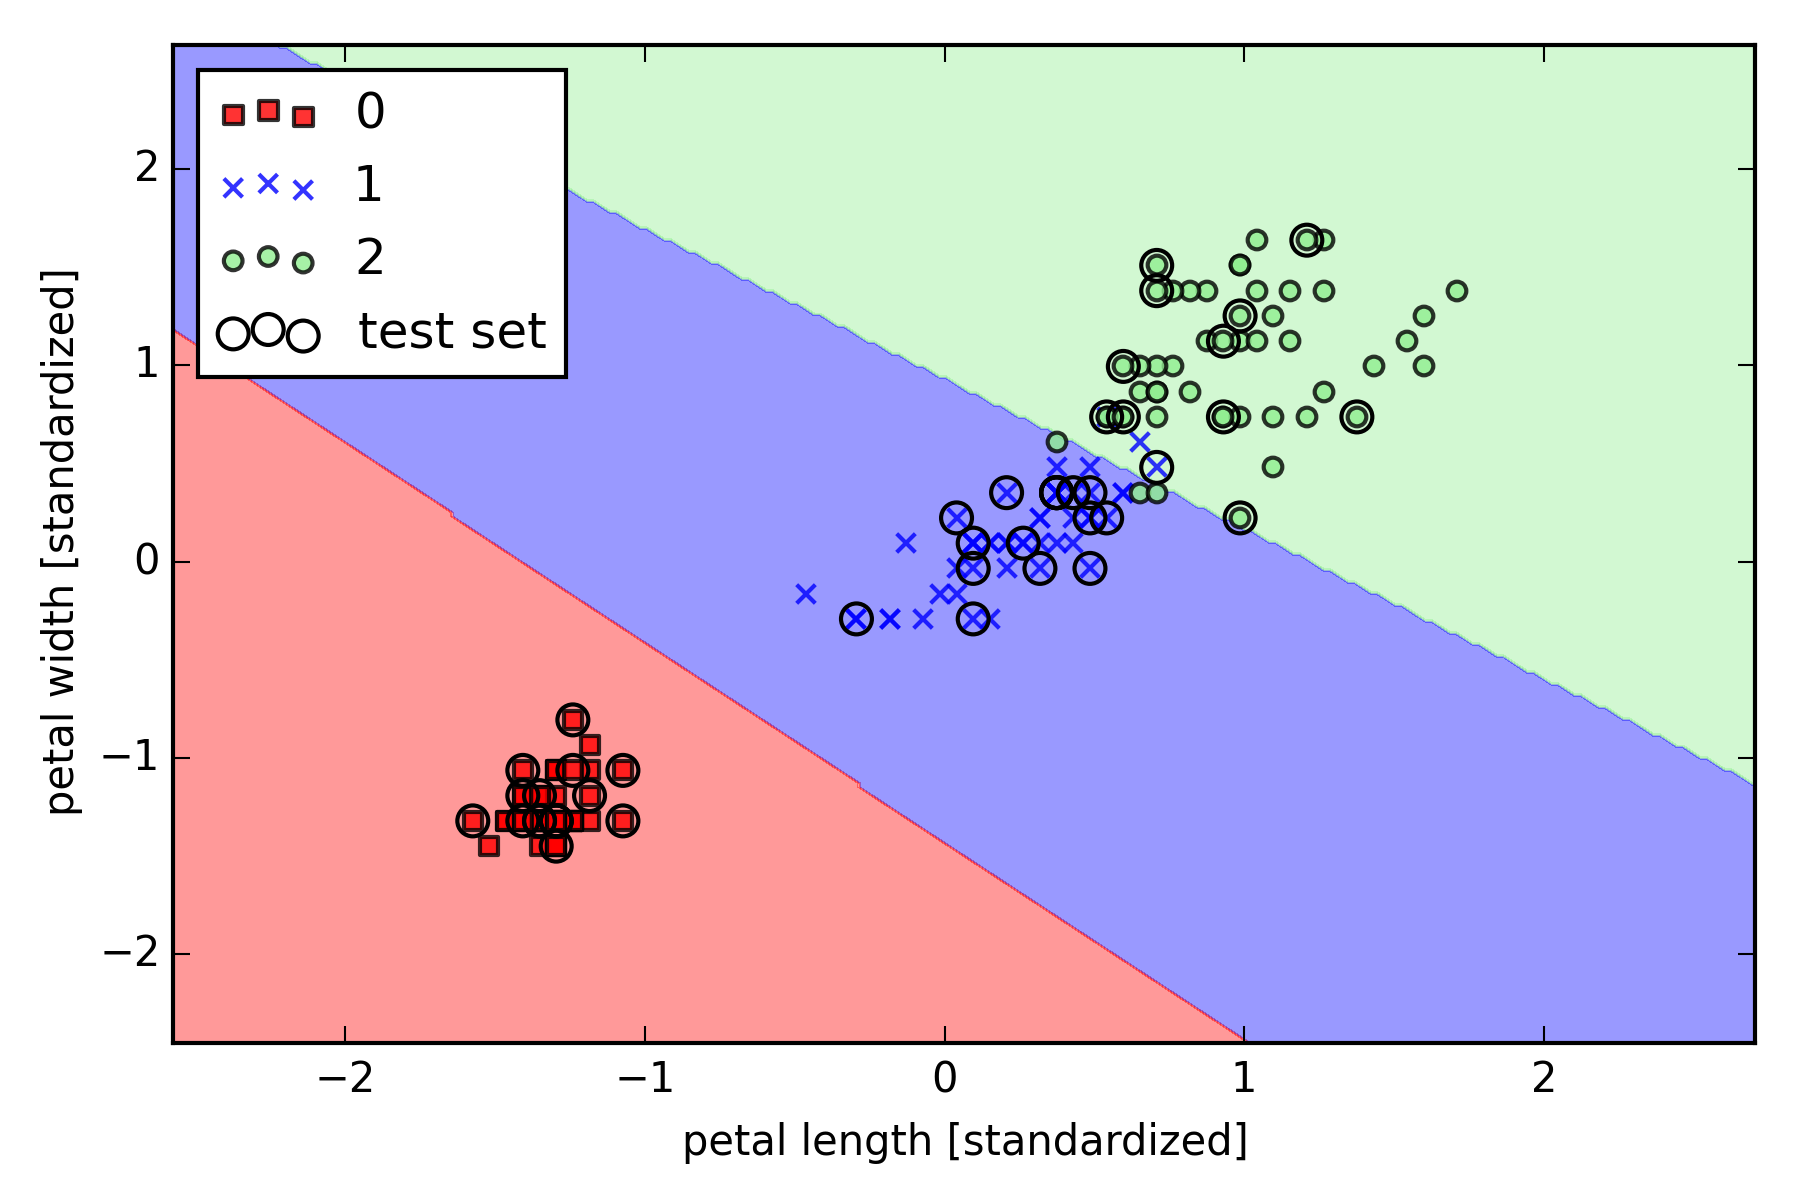

In [0]:
Image(filename='images/03_09.png', width=700) 

## Maximum margin intuition

Rationale: having a larger margin tends to make the classifier less prone to overfitting

Derivation of the expression of the margin: $\frac{2}{||w||_2}$

Derivation of the (hard) constraints:

$$
\begin{cases}
  w^T x^{(i)} + w_0 \ge 1 & \text{if $y^{(i)} = 1$} \\
  w^T x^{(i)} + w_0 \le -1 & \text{if $y^{(i)} = -1$}
\end{cases}
, i=1,2,\dots, n
$$

$$
 y^{(i)} (w^T x^{(i)} + w_0)\ge 1, \;\; i=1,2,\dots,n
$$

Hard-margin SVM QP (feasible only for linearly separable cases):

$$
 \min_{w,w_0} \;\; \frac12 \|w\|_2^2\\
 \text{subject to} \;\; y^{(i)} (w^T x^{(i)} + w_0)\ge 1, \;\; i=1,2,\dots,n
$$

## Dealing with the nonlinearly separable case using slack variables

Soft-margin SVM QP (feasible in any case):

\begin{align*}
 \min_{w,w_0} &\;\; \frac12 \|w\|_2^2 + C \sum_{i=1}^n \xi_i\\
 \text{subject to} &\;\; y^{(i)} (w^T x^{(i)} + w_0) \ge 1 - \xi_i, \;\; i=1,2,\dots,n \\
  & \xi_i \ge 0
\end{align*}

$\xi_i$: slack variable

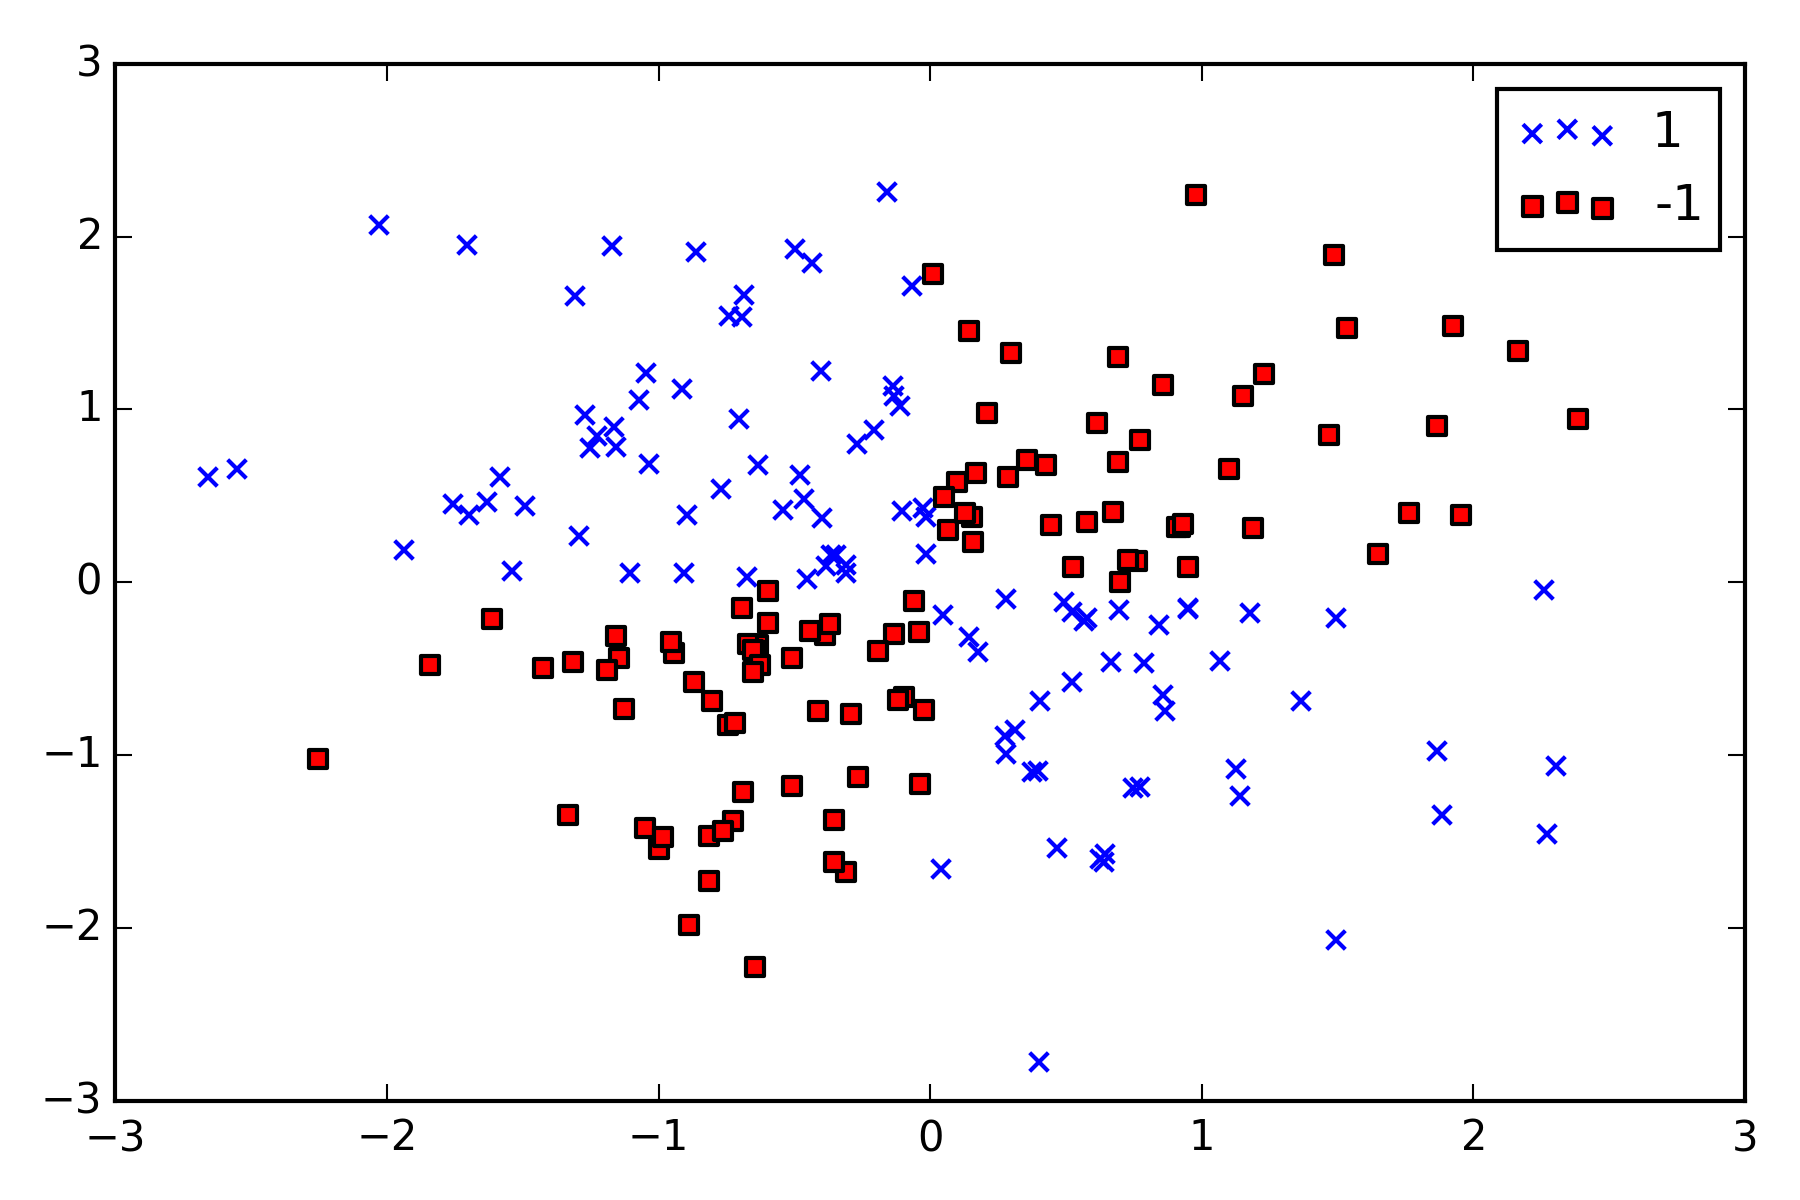

In [0]:
Image(filename='images/03_10.png', width=600) 

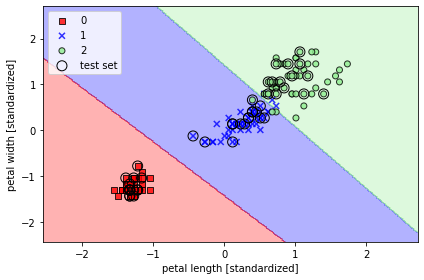

In [0]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=100.0, random_state=1)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, 
                      y_combined,
                      classifier=svm, 
                      test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Alternative implementations

- Perceptron, LogisticRegression classes: 
   - LIBLINEAR C/C++ library
   - The National Taiwan University (http:// www.csie.ntu.edu.tw/~cjlin/liblinear/)
- SVC class
   - LIBSVM C/C++ library
   - http://www.csie.ntu.edu.tw/~cjlin/libsvm/
   

In [0]:
from sklearn.linear_model import SGDClassifier

ppn = SGDClassifier(loss='perceptron', max_iter=1000)
lr = SGDClassifier(loss='log', max_iter=1000)
svm = SGDClassifier(loss='hinge', max_iter=1000)

# Solving non-linear problems using a kernel SVM

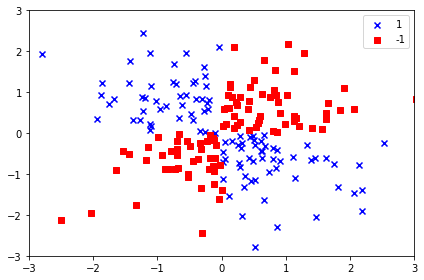

In [0]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

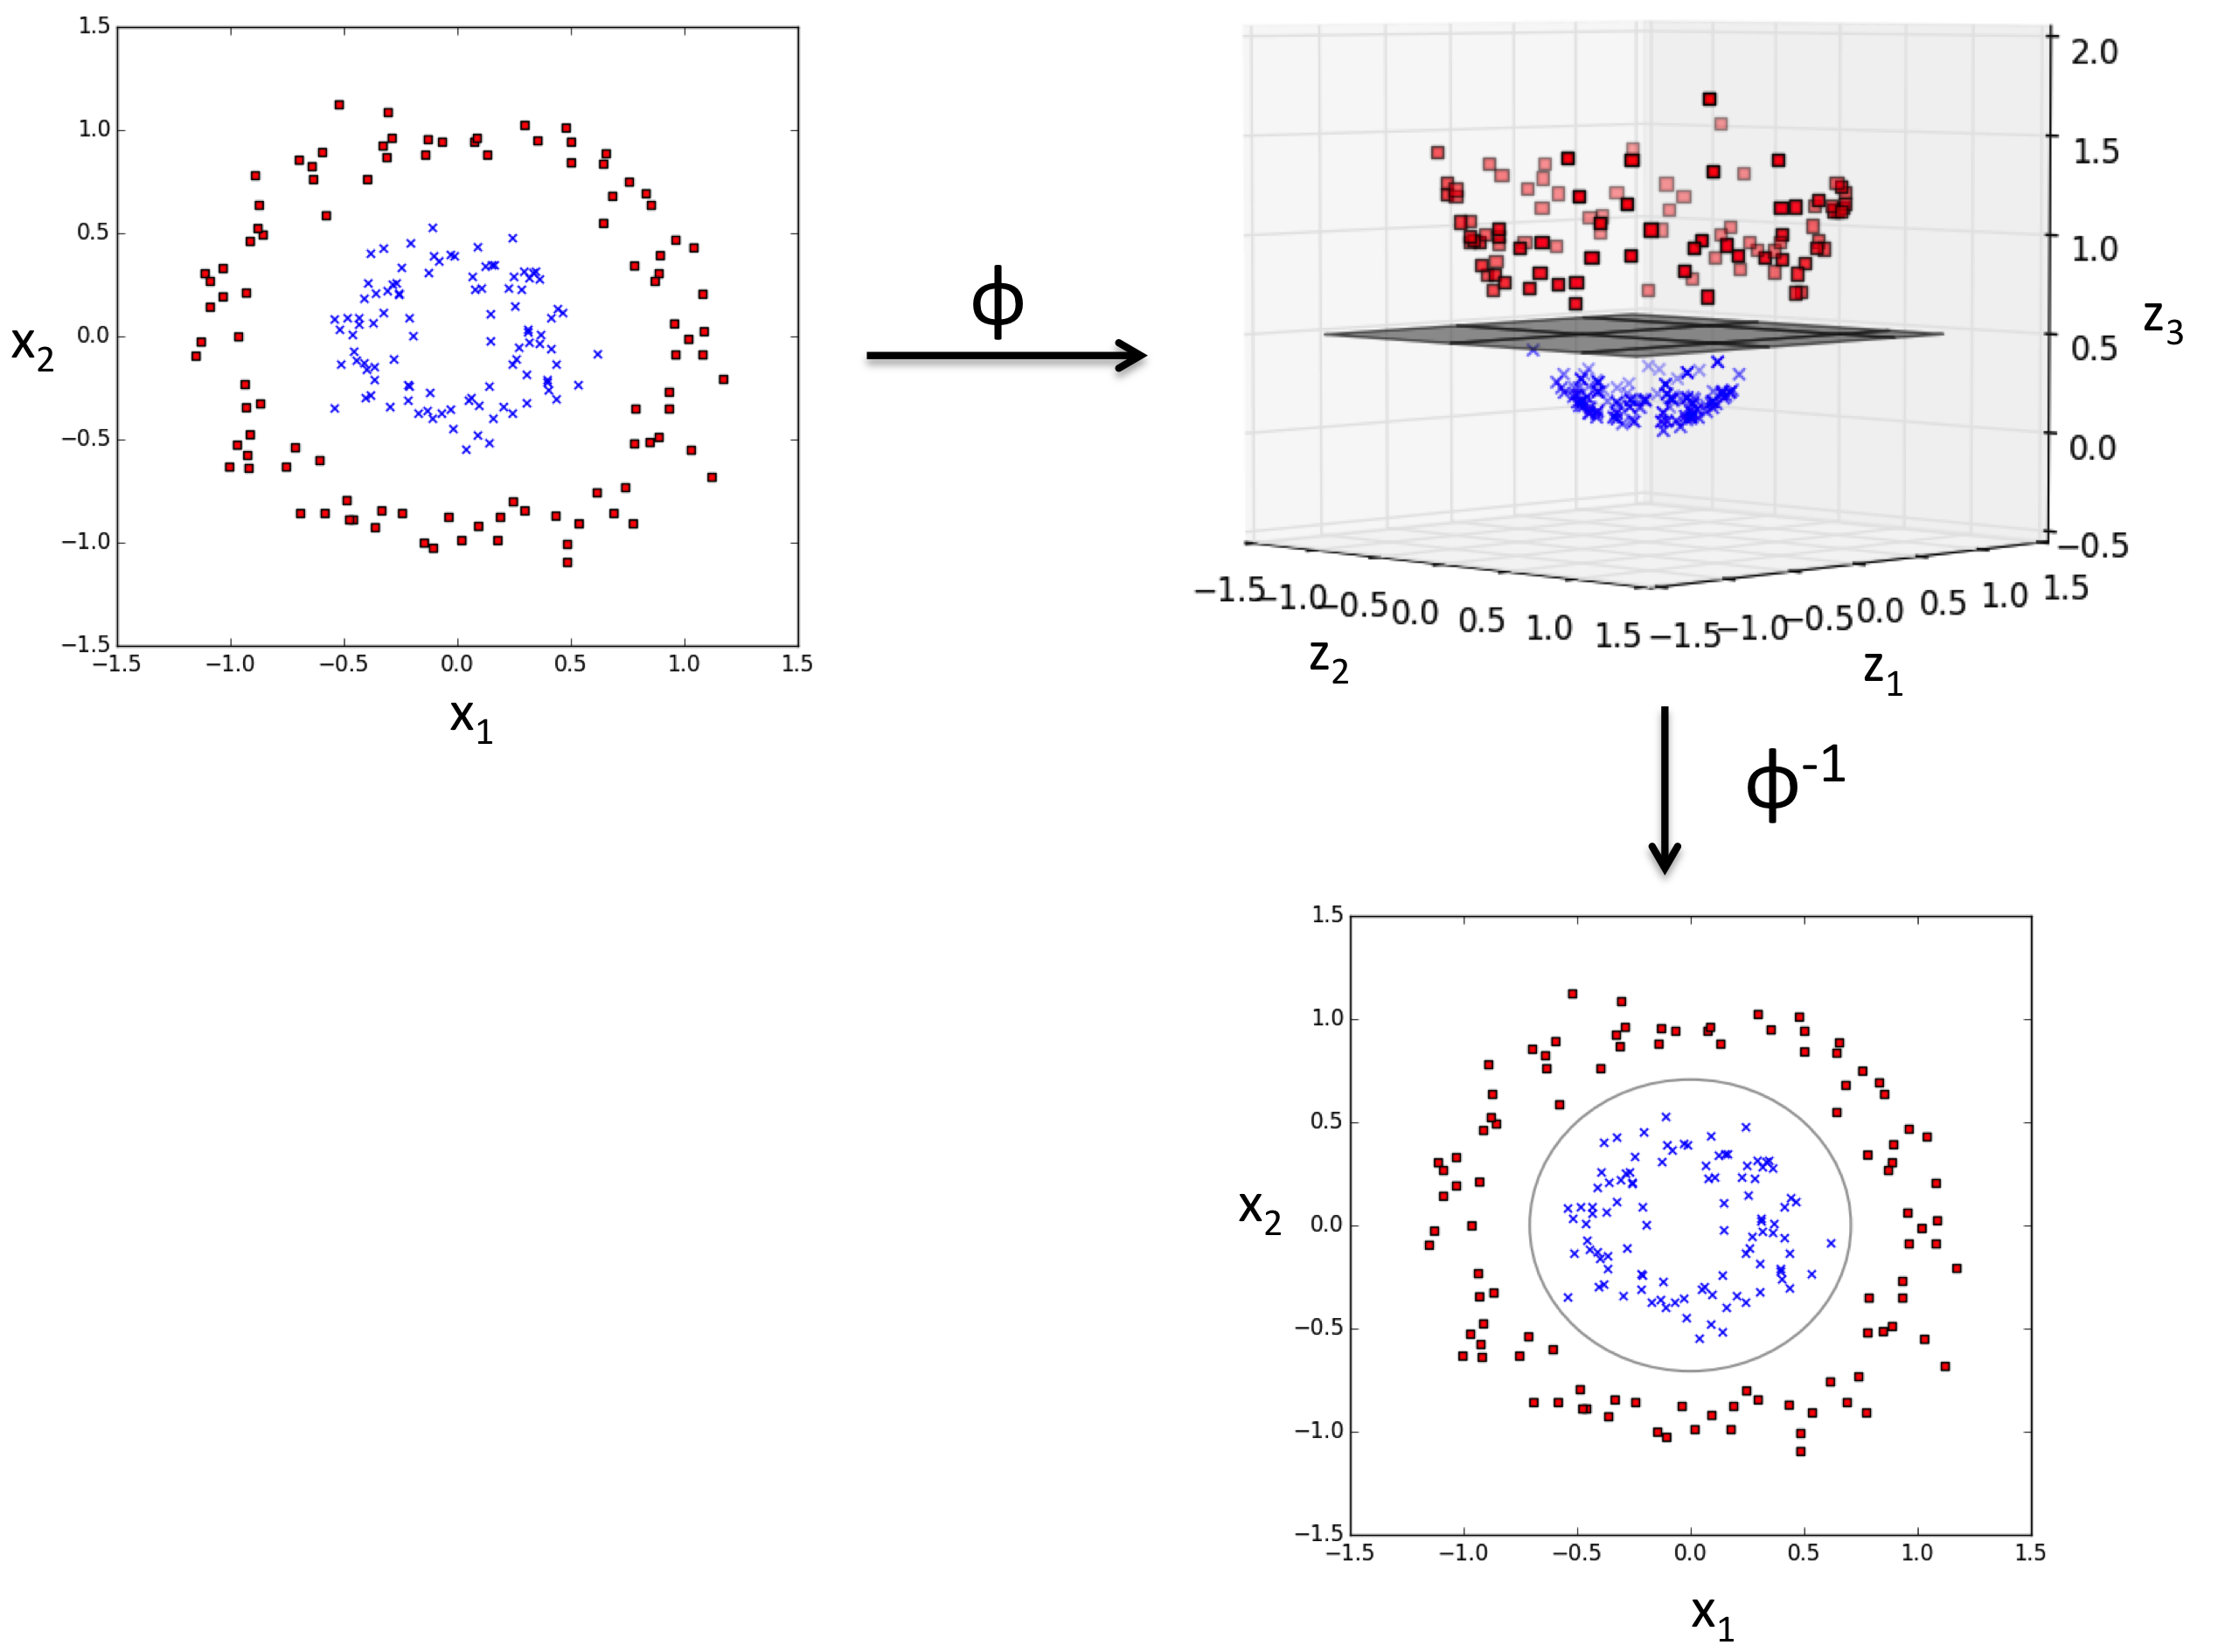

In [0]:
Image(filename='./images/03_11.png', width=700) 

## Using the kernel trick to find separating hyperplanes in higher dimensional space

Defining $\phi(\cdot)$ explicitly can be very difficult and computationally inefficient for high-dimensional input points

Kernel trick: define the *kernel function* instead:
$$
  k(x^{(i)},x^{(j)}) = \langle \phi(x^{(i)}), \phi(x^{(j)}) \rangle
$$

#### Radial Basis Function Kernel (RBF Kernel), a.k.a. Gaussian Kernel:
\begin{align*}
 k(x^{(i)},x^{(j)}) &= \exp\left( -\frac{\|x^{(i)}-x^{(j)}\|_2^2}{2\sigma^2} \right)
 = \exp\left( - \gamma \|x^{(i)}-x^{(j)}\|_2^2 \right)
\end{align*}

The (hyper) parameter $\gamma = \frac{1}{2\sigma^2}$ is to be determined.

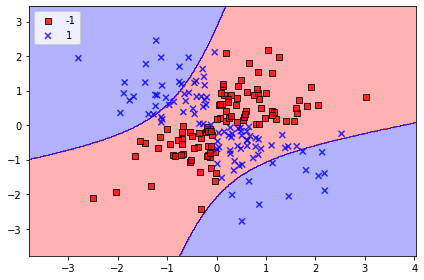

In [0]:
svm = SVC(kernel='rbf', random_state=1, gamma=.01, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor,
                      classifier=svm)

plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_14.png', dpi=300)
plt.show()

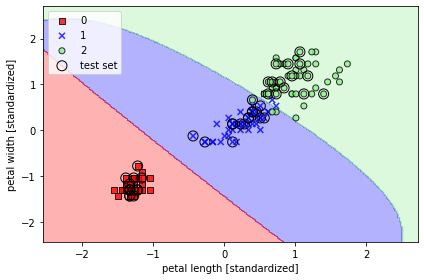

In [0]:
from sklearn.svm import SVC

svm = SVC(kernel='rbf', random_state=1, gamma=0.2, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined,
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_15.png', dpi=300)
plt.show()

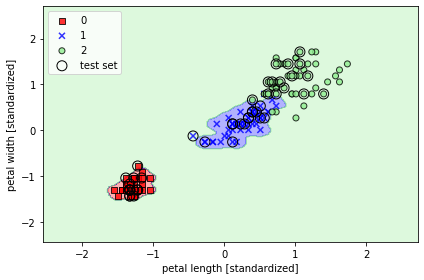

In [0]:
svm = SVC(kernel='rbf', random_state=1, gamma=100.0, C=1.0)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, y_combined, 
                      classifier=svm, test_idx=range(105, 150))
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
#plt.savefig('images/03_16.png', dpi=300)
plt.show()